<a href="https://colab.research.google.com/github/DilshanBotheju/BankMarketingPredictionSystem/blob/main/ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import pandas as pd

In [157]:
# Load the data set with seperated columns
data_path = "/content/drive/MyDrive/CM2604_CW/bank-additional-full.csv"
bank_data = pd.read_csv(data_path, encoding = "latin-1", sep =";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [158]:
# To get no. of columns and rows
bank_data.shape

(41188, 21)

In [159]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [160]:
# Duplicate handling
duplicates = bank_data.duplicated().sum()
duplicates



12

In [161]:
# Remove duplicate
bank_data = bank_data.drop_duplicates()

In [162]:
# Rows after removing duplicates
bank_data.shape

(41176, 21)

In [163]:
# Replace places with unknown to null in whole dataset
bank_data = bank_data.replace("unknown",pd.NA)

In [164]:
# To calculate no. of null fields in each column
bank_data.isnull().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [165]:
# Getting category counts for y column
bank_data["y"].value_counts()

,count
y,
no,36537
yes,4639


In [166]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for "y" column
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

In [167]:
# Getting numerical columns
numeric_bank_data = bank_data.select_dtypes(include= "number")
numeric_bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [168]:
# To identify correlation among y column and other numeric columns
correlation = numeric_bank_data.corr()["y"]
correlation

,y
age,0.030381
duration,0.405297
campaign,-0.066361
pdays,-0.324948
previous,0.230202
emp.var.rate,-0.298289
cons.price.idx,-0.136134
cons.conf.idx,0.054802
euribor3m,-0.307740
nr.employed,-0.354669


In [169]:
#Getting categorical columns
categorical_bank_data = bank_data.select_dtypes(include="object")
categorical_bank_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,<NA>,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [170]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


age column

In [171]:
bank_data["age"].value_counts()

,count
age,
31,1947
32,1845
33,1833
36,1779
35,1758
...,...
89,2
91,2
94,1


In [172]:
# Handling multiple age categories
def setAge(age):
    if age>=18 and age<=35:
        return "Young citizens"
    elif age>35 and age<=55:
        return "Middle Aged citizens"
    else:
        return "Senior citizens"


bank_data["age"] = bank_data["age"].apply(setAge)

In [173]:
bank_data["age"].value_counts()

,count
age,
Middle Aged citizens,21086
Young citizens,16504
Senior citizens,3586


job column

In [174]:
# To handle null values when encoding
def setJob(job):
    if pd.isna(job):
        return "Null"
    else:
        return job

bank_data["job"] = bank_data["job"].apply(setJob)

In [175]:
bank_data["job"].value_counts()

,count
job,
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


marital column

In [176]:
# Handle null values when enoding
def setMarital(marital):
    if pd.isna(marital):
        return "Null"
    else:
        return marital

bank_data["marital"] = bank_data["marital"].apply(setMarital)

In [177]:
bank_data["marital"].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
Null,80


month column

In [178]:
bank_data["month"].value_counts()

,count
month,
may,13767
jul,7169
aug,6176
jun,5318
nov,4100
apr,2631
oct,717
sep,570
mar,546


education column

In [179]:
# Making the available categories simple
def setEducation(education):
    if pd.isna(education):
        return "Null"
    elif education in ["basic.9y", "basic.6y", "basic.4y"]:
        return "basic"
    else:
        return education

# Applying the function
bank_data["education"] = bank_data["education"].apply(setEducation)

In [180]:
bank_data["education"].value_counts()

,count
education,
basic,12512
university.degree,12164
high.school,9512
professional.course,5240
Null,1730
illiterate,18


In [181]:
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,Senior citizens,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,Senior citizens,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,Middle Aged citizens,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,Middle Aged citizens,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,Senior citizens,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


default amount column

In [182]:
# Handle null values in default column
def setDefault(default):
    if pd.isna(default):
        return "Null"
    else:
        return default

# Apply function to column
bank_data["default"] = bank_data["default"].apply(setDefault)

In [183]:
bank_data["default"].value_counts()

,count
default,
no,32577
Null,8596
yes,3


housing loan column

In [184]:
# Handle null values
def setHousing(housing):
    if pd.isna(housing):
        return "Null"
    else:
        return housing

bank_data["housing"] = bank_data["housing"].apply(setHousing)

In [185]:
bank_data["housing"].value_counts()

,count
housing,
yes,21571
no,18615
Null,990


personal loan column

In [186]:
# Handle null values
def setPersonal(personal):
    if pd.isna(personal):
        return "Null"
    else:
        return personal

bank_data["loan"] = bank_data["loan"].apply(setPersonal)

In [187]:
bank_data["loan"].value_counts()

,count
loan,
no,33938
yes,6248
Null,990


contact column

In [188]:
bank_data["contact"].value_counts()

,count
contact,
cellular,26135
telephone,15041


pdays column

In [189]:
# Convert 999 days to -1
bank_data["pdays"] = bank_data["pdays"].replace(999,-1)

In [190]:
bank_data["pdays"].value_counts()

,count
pdays,
-1,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


Feature Engineering

In [191]:
# Update the categorical columns
categorical_bank_data = bank_data.select_dtypes(include="object")

# Label encoding categorical colums
for column in categorical_bank_data.columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

In [192]:
# Display encoded dataset
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,4,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,8,2,2,0,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,8,2,2,1,2,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,8,2,2,1,1,2,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [193]:
from sklearn.preprocessing import StandardScaler

# Assuming numeric_bank_data is a subset of bank_data
numeric_columns = bank_data.select_dtypes(include=["float64", "int64"]).columns
print(numeric_columns)

# Remove y column
numeric_columns = numeric_columns.drop("y")

# Standardize the numeric columns
ss = StandardScaler()
bank_data[numeric_columns] = ss.fit_transform(bank_data[numeric_columns])

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [194]:
correlation = bank_data.corr()["y"]
correlation

,y
age,0.064286
job,0.025547
marital,0.044585
education,0.048877
default,0.099210
housing,0.011436
loan,-0.003151
contact,-0.144774
month,-0.006051
day_of_week,0.015970


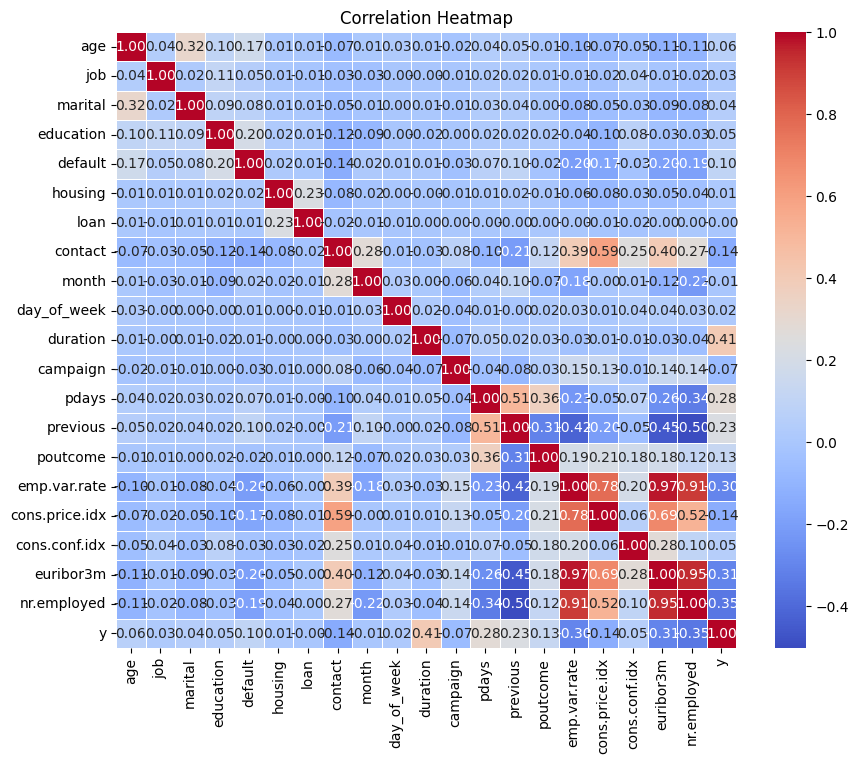

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix to find inter correlation
correlation_matrix = bank_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [196]:
# Drop columns due to correlation, null value handling, multi collineariry etc
bank_data = bank_data.drop(["default","day_of_week","duration","contact","month","housing","loan","euribor3m","nr.employed"], axis=1, errors="ignore")

In [197]:
# View finalized dataset
bank_data.head(20)

,age,job,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,0.117263,-0.176466,-0.269986,-1.000229,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
1,0.117263,0.947503,-0.269986,-0.429746,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
2,-0.936520,0.947503,-0.269986,-0.429746,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
3,-0.936520,-1.019443,-0.269986,-1.000229,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
4,0.117263,0.947503,-0.269986,-0.429746,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
5,-0.936520,0.947503,-0.269986,-1.000229,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
6,0.117263,-1.019443,-0.269986,0.711219,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
7,-0.936520,-0.738451,-0.269986,-1.570711,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
8,1.171047,1.509487,1.366544,0.711219,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0
9,1.171047,0.947503,1.366544,-0.429746,-0.565963,-0.17086,-0.349551,0.192651,0.648101,0.722628,0.886568,0


In [198]:
# Seperating traget variable and features
X = bank_data.drop("y", axis = 1).values
y = bank_data["y"].values

In [199]:
from imblearn.over_sampling import SMOTE

# Balancing dataset using SMOTE
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [200]:
# Checking the balanced dataset
X_balanced.shape, y_balanced.shape


((73074, 11), (73074,))

<Axes: >

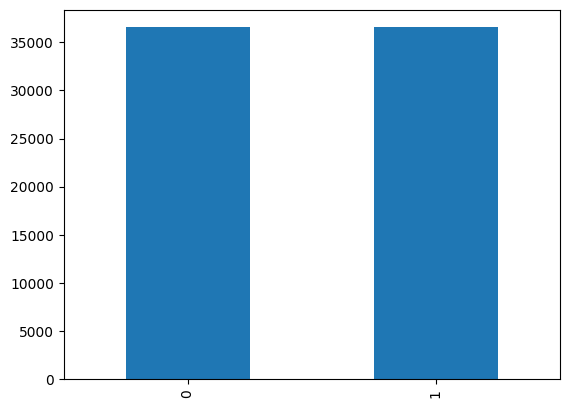

In [201]:
# View balanced data columns
y_balanced = pd.Series(y_balanced)
y_balanced.value_counts().plot(kind="bar")

In [202]:
from sklearn.model_selection import train_test_split

# Seperating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced)

In [203]:
# Checking training and testing count for target varaible
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
print(y_train.value_counts())
print(y_test.value_counts())

0    25576
1    25575
Name: count, dtype: int64
1    10962
0    10961
Name: count, dtype: int64


In [204]:
# To see the training and testing data
X_train.shape, X_test.shape

((51151, 11), (21923, 11))

Random Forest Classifier

Random Forest Classifier:
Training Accuracy: 0.925
Testing Accuracy: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     10961
           1       0.91      0.85      0.88     10962

    accuracy                           0.88     21923
   macro avg       0.88      0.88      0.88     21923
weighted avg       0.88      0.88      0.88     21923



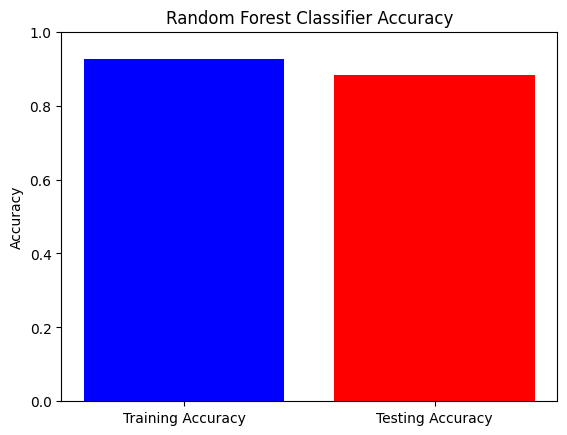


ROC-AUC Score: 0.951



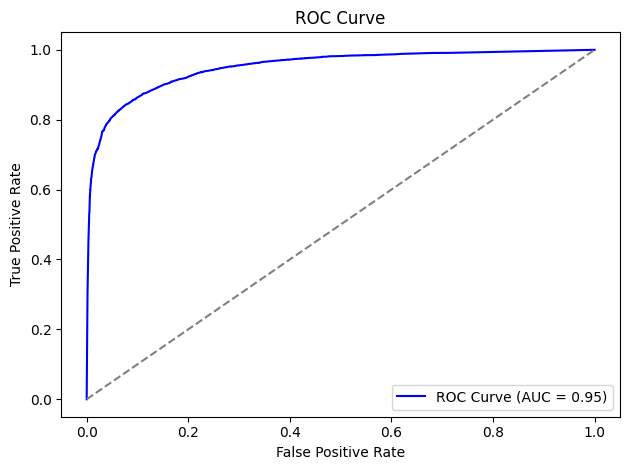

In [205]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Initialize Random Forest Classifier
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Fit the model
randomforest_model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = randomforest_model.predict(X_train)
y_test_pred = randomforest_model.predict(X_test)
y_test_prob_rf = randomforest_model.predict_proba(X_test)[:, 1]

# Evaluate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate ROC-AUC score
RF_ROC = roc_auc_score(y_test, y_test_prob_rf)

# Print evaluation metrics
print("Random Forest Classifier:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plotting Accuracy Comparison
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_accuracy, test_accuracy], color=["blue", "red"])
plt.title("Random Forest Classifier Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print(f"\nROC-AUC Score: {RF_ROC:.3f}\n")

# Plotting ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, randomforest_model.predict_proba(X_test)[:, 1])
plt.plot(rf_fpr, rf_tpr, color='blue', label=f"ROC Curve (AUC = {RF_ROC:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()


Neural Network

Epoch 1/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7135 - loss: 0.5687 - val_accuracy: 0.7453 - val_loss: 0.5355
Epoch 2/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7374 - loss: 0.5426 - val_accuracy: 0.7480 - val_loss: 0.5310
Epoch 3/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7390 - loss: 0.5403 - val_accuracy: 0.7488 - val_loss: 0.5260
Epoch 4/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7392 - loss: 0.5370 - val_accuracy: 0.7475 - val_loss: 0.5222
Epoch 5/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7387 - loss: 0.5351 - val_accuracy: 0.7500 - val_loss: 0.5212
Epoch 6/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7451 - loss: 0.5289 - val_accuracy: 0.7505 - val_loss: 0.5203
Epoch 7/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7462 - loss: 0.5262 - val_accuracy: 0.7505 - val_loss: 0.5189
Epoch 8/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7444 - loss

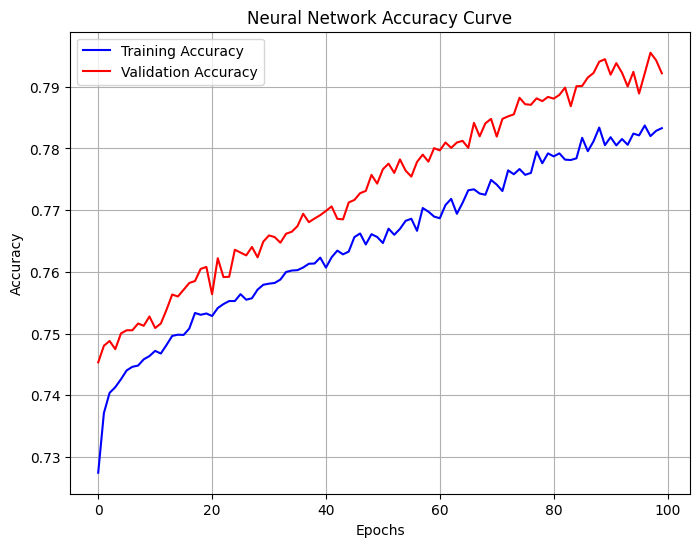


ROC-AUC Score: 0.876


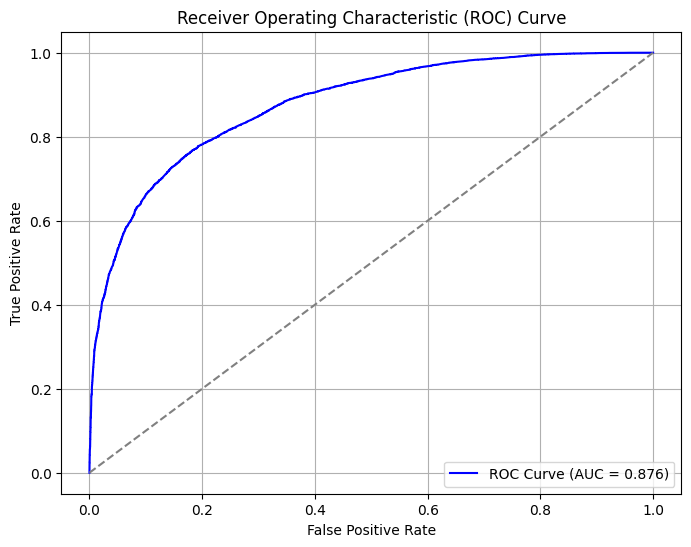

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc

# Define the neural network model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Use of 5 hidden layers and dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))


# Output Layer with Sigmoid for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
NN_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate training and testing performance
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\nModel Evaluation:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Predict probabilities and classes
y_test_pred_probs = model.predict(X_test, verbose=0).ravel()
y_test_pred_classes = (y_test_pred_probs >= 0.5).astype(int)


print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))

# Plot the curve
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy
plt.plot(NN_model.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(NN_model.history["val_accuracy"], label="Validation Accuracy", color="red")

plt.title("Neural Network Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Calculate and print ROC-AUC and classification report
NN_ROC = roc_auc_score(y_test, y_test_pred_probs)
print(f"\nROC-AUC Score: {NN_ROC:.3f}")

nn_fpr, nn_tpr, thresholds = roc_curve(y_test, y_test_pred_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(nn_fpr, nn_tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()








Comparison


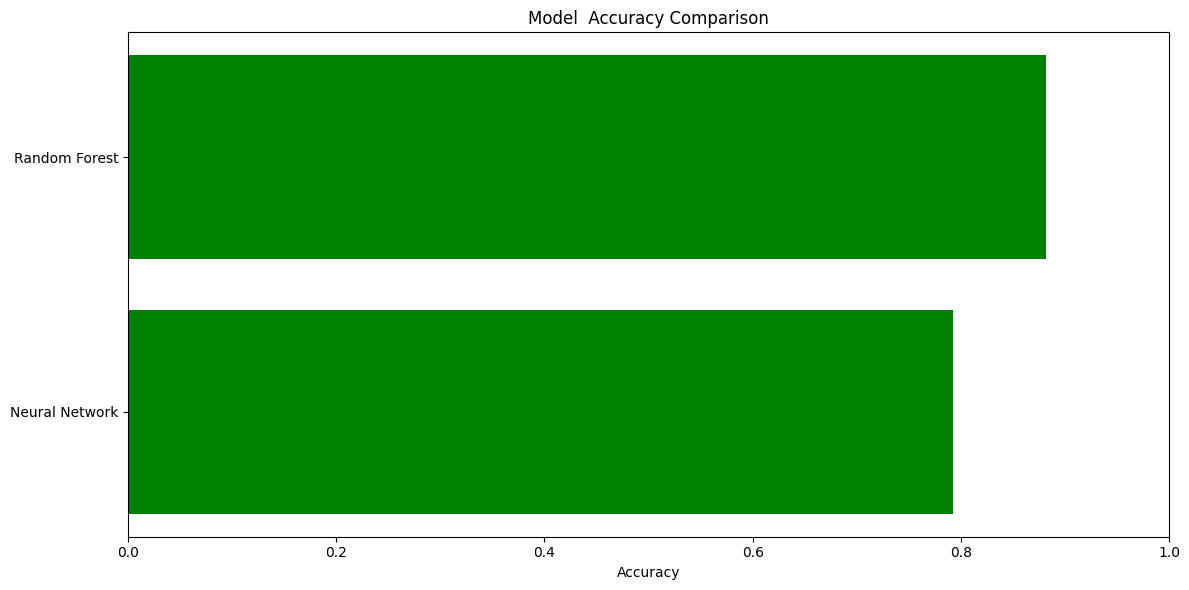


Random Forest Accuracy: 0.882
Neural Network Accuracy: 0.79



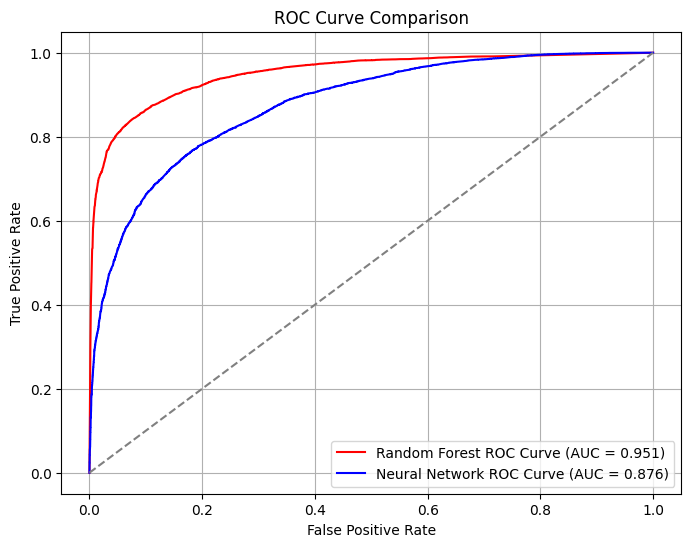


ROC-AUC Score: 0.876
ROC-AUC Score: 0.951



In [207]:
# Initialize lists to store metrics for each model
model_names = []
accuracies = []
roc_aucs = []

# Function to store metrics
def store_metrics(model_name, accuracy, roc_auc):
    model_names.append(model_name)
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)


# Store details of models
store_metrics("Neural Network", test_accuracy, NN_ROC)
store_metrics("Random Forest", accuracy_score(y_test, y_test_pred), RF_ROC)

# Plot comparison of accuracies
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.barh(model_names, accuracies, color='green')
plt.xlabel("Accuracy")
plt.title("Model  Accuracy Comparison")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print(f"\nRandom Forest Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Neural Network Accuracy: {test_accuracy:.2f}\n")

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color="red", label=f"Random Forest ROC Curve (AUC = {RF_ROC:.3f})")
plt.plot(nn_fpr, nn_tpr, color="blue", label=f"Neural Network ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"\nROC-AUC Score: {NN_ROC:.3f}")
print(f"ROC-AUC Score: {RF_ROC:.3f}\n")
